In [1]:
#Import our dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

 # Import our input dataset
cbp2_df = pd.read_csv("Clean_Bee_Pop.csv")
cbp2_df.head()

,Year,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Varroa_mites,Other_parasites,Diseases,Pestticides,Other3,Unknown,POPULATION
0,2015,AL,8000,8000,610,8,3,6,0,0,3,2,4852347
1,2015,AZ,36000,39000,12000,31,50,2,1,4,1,16,6829676
2,2015,AR,23000,27000,2400,9,38,10,0,8,9,1,2978048
3,2015,CA,750000,1260000,149000,12,37,13,6,12,11,7,38918045
4,2015,CO,24000,24000,2500,10,48,24,21,20,8,2,5450623


In [2]:
cbp2_df.drop(columns=["Maximum_colonies1", "Diseases","Varroa_mites","Year", "Other3","colonies", "POPULATION","Unknown","Lost_colonies","Other_parasites"], inplace=True)

In [3]:
cbp2_df.head()

,State,Percent_lost2,Pestticides
0,AL,8,0
1,AZ,31,4
2,AR,9,8
3,CA,12,12
4,CO,10,20


In [4]:
cbp2_df.to_csv("cbp2.csv")

In [5]:
dataset = pd.read_csv('cbp2.csv')
X = dataset['Pestticides'].values
y = dataset['Percent_lost2'].values
dataset.head(5)

,Unnamed: 0,State,Percent_lost2,Pestticides
0,0,AL,8,0
1,1,AZ,31,4
2,2,AR,9,8
3,3,CA,12,12
4,4,CO,10,20


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [7]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [8]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [9]:
dataset= pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
dataset

,Real Values,Predicted Values
0,15,12.000000
1,3,9.780000
2,4,9.780000
3,8,10.375000
4,9,9.780000
5,8,11.000000
6,13,17.000000
7,11,9.222222
8,10,11.000000
9,9,14.000000


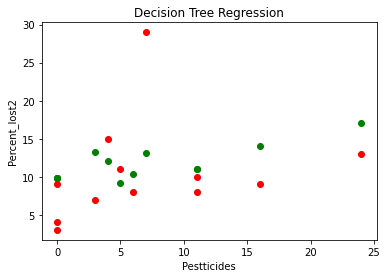

In [10]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Pestticides')
plt.ylabel('Percent_lost2')
plt.show()

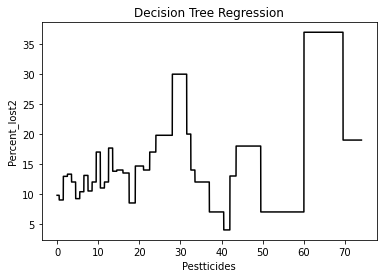

In [11]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Pestticides')
plt.ylabel('Percent_lost2')
plt.show()